In [ ]:
#load dataset

Shape: (60000, 28, 28)
Training images: 60000
Image height: 28
Image width: 28


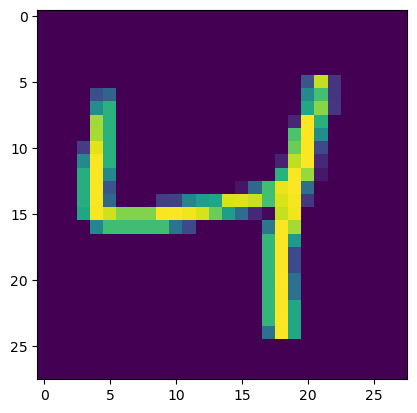

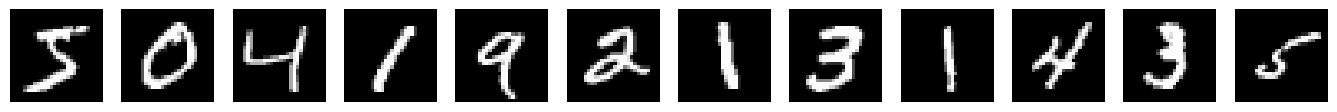

In [1]:
#8-1-a

from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_train_images = X_train.shape[0]
num_test_images = X_test.shape[0]
image_height = X_train.shape[1]
image_width = X_train.shape [2]
print("Shape: " + str(X_train.shape))
print("Training images: " + str(num_train_images))
print("Image height: " + str(image_height))
print("Image width: " + str(image_width))

plt.imshow(X_train[2])

fig, axs = plt.subplots(1,12, figsize=(17,6))
for i in range(12):
    axs[i].imshow(X_train[i], cmap = plt.get_cmap('gray'))
    axs[i].axis('off')

This Python code is using the Keras library to load the MNIST dataset, which is a large database of handwritten digits that is commonly used for training various image processing systems. The code then uses matplotlib to visualize the data.

Here's a step-by-step explanation:

1. Import the necessary libraries: Keras for the dataset and matplotlib for visualization.

2. Load the MNIST dataset using the `mnist.load_data()` function. This function returns two tuples of Numpy arrays, the first tuple represents the training set and the second tuple the test set.

3. Extract the number of training images, test images, image height, and image width from the shapes of the loaded data.

4. Print the shape of the training set, the number of training images, and the dimensions of the images.

5. Display the third image in the training set using `plt.imshow()`.

6. Create a 1x12 subplot using `plt.subplots()`, which will contain 12 images from the training set.

7. In a loop, display the first 12 images in the training set on the subplot. The images are displayed in grayscale and the axis is turned off for each subplot.

This code is a common way to explore and visualize the MNIST dataset before proceeding with further data processing or model training.

In [2]:
!pip install np_utils


  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=12a365663a7058d257274c5221c5c821252d4adf147a33bcefa198e1a5cc1762
  Stored in directory: /Users/ivanp/Library/Caches/pip/wheels/dd/bd/f5/0975fe5179dfa2f996b436596b159824432fb3c1ca74bcf43e
Successfully built np_utils


In [3]:
#8-1-b

#from keras.utils import np_utils
from keras.utils import to_categorical

X_train = X_train.reshape(num_train_images, image_height *
                          image_width).astype('float32')
X_test = X_test.reshape(num_test_images, image_height *
                        image_width).astype('float32')
print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

print("y_train sample 5 value: " + str(y_train[5]))
print("y_train sample 2 value: " + str(y_train[2]))

X_train = X_train / 255   # values [0..1] improve results
X_test = X_test / 255

#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("categorical y_train shape: " + str(y_train.shape))
print("categorical y_train sample 5 value: " + str(y_train[5]))
print("categorical y_train sample 2 value: " + str(y_train[2]))
num_classes = y_test.shape[1]
print(num_classes)

X_train.shape: (60000, 784)
X_test.shape: (10000, 784)
y_train.shape: (60000,)
y_test.shape: (10000,)
y_train sample 5 value: 2
y_train sample 2 value: 4
categorical y_train shape: (60000, 10)
categorical y_train sample 5 value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
categorical y_train sample 2 value: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
10


This Python code is part of a machine learning pipeline that prepares the MNIST dataset for training a model. The MNIST dataset is a collection of handwritten digits, and it's commonly used for training and testing in the field of machine learning.

The first part of the code reshapes the training and testing data (`X_train` and `X_test`). The MNIST dataset images are grayscale and 28x28 pixels. They are reshaped into a 1D array of 784 elements (28*28) using the `reshape` method. This is done because the machine learning model requires input in this format. The `astype('float32')` method is used to convert the pixel values to float32 type.

The code then prints the shapes of the training and testing data and labels (`X_train`, `X_test`, `y_train`, `y_test`) to verify the reshaping process. It also prints the 5th and 2nd sample values of `y_train` for inspection.

Next, the pixel values of the images, which are originally in the range of 0 to 255, are normalized to be between 0 and 1 by dividing them by 255. This normalization process can help improve the performance of the machine learning model.

The labels (`y_train` and `y_test`) are then converted from integer labels to categorical (one-hot) format using the `to_categorical` function from Keras. This is done because the model will be trained to predict the probability of each class, so the labels need to be in a format that matches this output.

Finally, the code prints the shape of the new categorical `y_train` and the 5th and 2nd sample values for inspection. It also stores the number of classes (which is the second dimension of the `y_test` shape) in the `num_classes` variable. This could be used later when defining the output layer of the machine learning model.

In [4]:
#8-1-c

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500,input_dim=image_height*image_width,activation='relu'))
model.add(Dense(10,  activation='softmax'))
print(model.summary())
EPOCHS = 50
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=256, verbose=0)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None


This Python code is using the Keras library to define and train a simple neural network model on the MNIST dataset.

Here's a step-by-step explanation:

1. Import the necessary classes from Keras: `Sequential` for the model and `Dense` for the layers.

2. Initialize a `Sequential` model. This type of model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

3. Add a `Dense` layer with 500 neurons and a 'relu' activation function to the model. The `input_dim` parameter is set to the total number of pixels in each image (which is the product of the image height and width). This is the input layer of the model.

4. Add another `Dense` layer with 10 neurons and a 'softmax' activation function. This is the output layer of the model. The number of neurons corresponds to the number of classes in the MNIST dataset (digits 0-9). The 'softmax' activation function is used in the output layer of a classification model when multiple classes are present.

5. Print a summary of the model using the `summary` method. This will display the architecture of the model, showing each layer with its type, output shape, and number of parameters.

6. Compile the model with the 'categorical_crossentropy' loss function, 'adam' optimizer, and 'accuracy' as the metric. The loss function and optimizer are used during the training process to update the model's weights. The metric is used to evaluate the performance of the model.

7. Fit the model to the training data using the `fit` method. The validation data, number of epochs, batch size, and verbosity level are also specified. The model will be trained for a specified number of epochs (iterations over the entire dataset), with a given batch size (number of samples per gradient update), and will output no information about the training process (since `verbose=0`). The model's performance will be evaluated on the validation data at the end of each epoch.

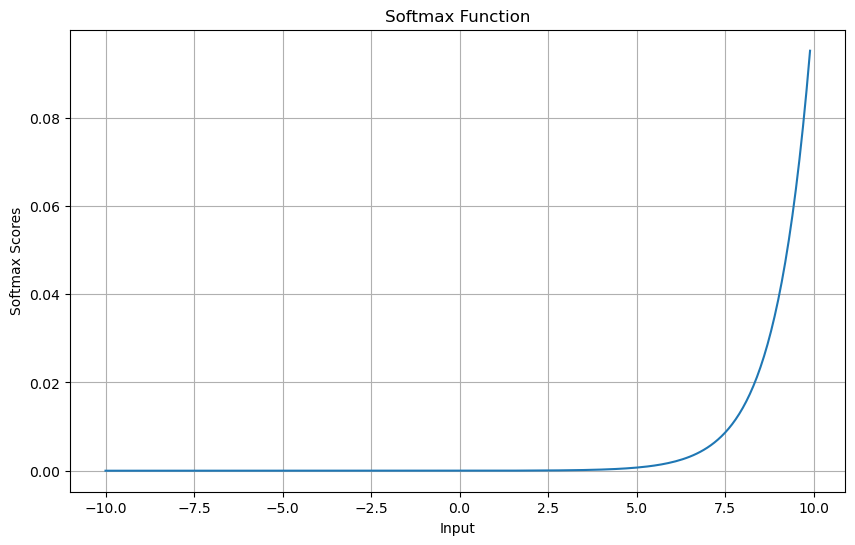

In [5]:
#show me a graph of softmax
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

scores = np.arange(-10, 10, 0.1)
scores_softmax = softmax(scores)

plt.figure(figsize=(10, 6))
plt.plot(scores, scores_softmax)
plt.title('Softmax Function')
plt.xlabel('Input')
plt.ylabel('Softmax Scores')
plt.grid(True)
plt.show()

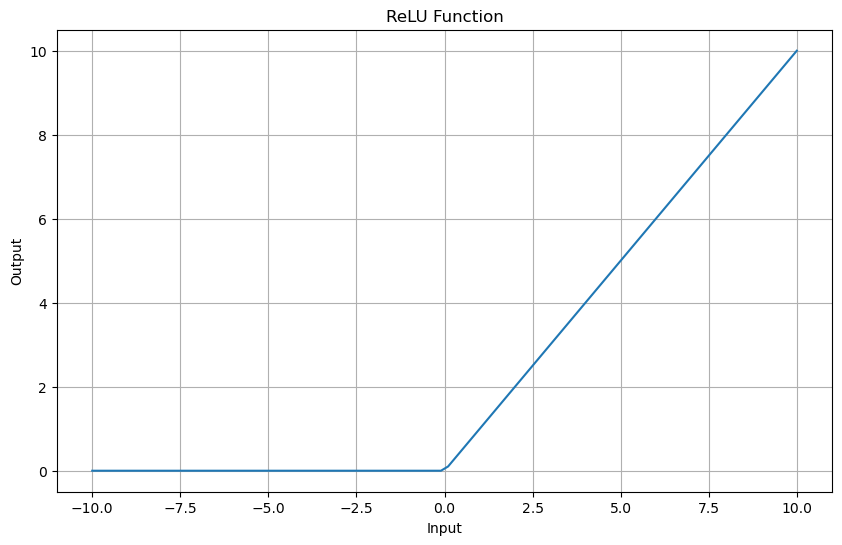

In [6]:
#show me a graph of relu
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()


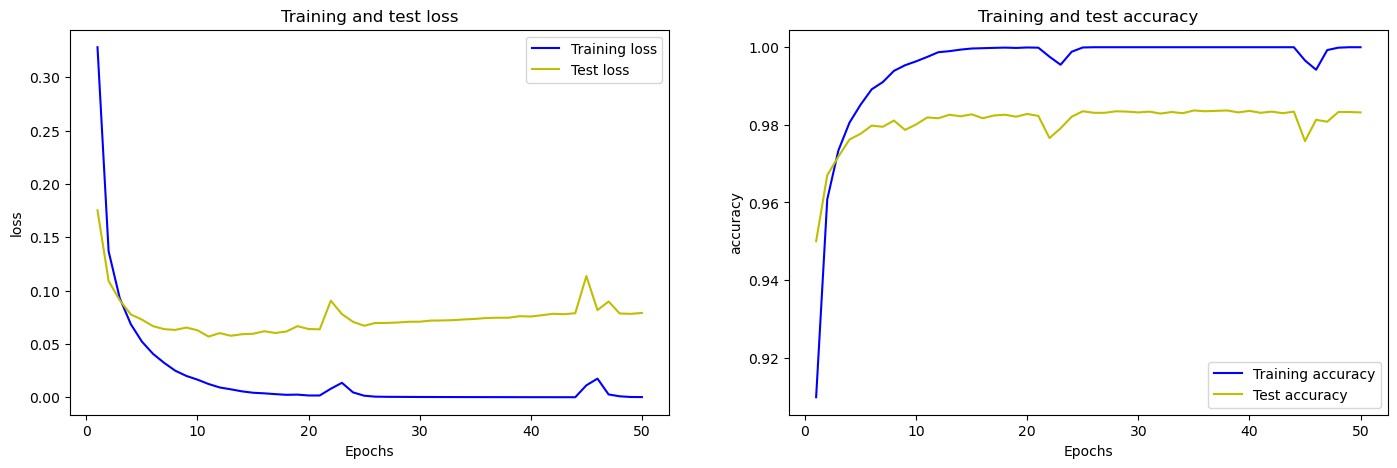

In [7]:
import numpy as np

def plot(h):
    LOSS = 0; ACCURACY = 1
    training = np.zeros((2,EPOCHS)); testing = np.zeros((2,EPOCHS))
    training[LOSS] = h.history['loss']
    testing[LOSS] = h.history['val_loss']    # validation loss
    training[ACCURACY] = h.history['accuracy']
    testing[ACCURACY] = h.history['val_accuracy']  # validation accuracy

    epochs = range(1,EPOCHS+1)
    fig, axs = plt.subplots(1,2, figsize=(17,5))
    for i, label in zip((LOSS, ACCURACY),('loss', 'accuracy')):
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Test ' + label)
        axs[i].set_title('Training and test ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()
    plt.show()

plot(history)

The provided Python code is a function named `plot` that is used to visualize the training and testing loss and accuracy of a machine learning model over a number of epochs. The function takes one argument `h`, which is expected to be the history object returned by the `fit` method of a Keras model.

The function begins by defining two constants, `LOSS` and `ACCURACY`, which are set to 0 and 1 respectively. These constants are used as indices to store and retrieve loss and accuracy data from numpy arrays.

Next, two 2D numpy arrays, `training` and `testing`, are initialized with zeros. The first dimension of these arrays is 2, corresponding to loss and accuracy, and the second dimension is `EPOCHS`, which is not defined in the provided code but is presumably a global constant representing the number of training epochs.

The function then populates the `training` and `testing` arrays with data from the history object. The loss and accuracy for the training data are stored in `h.history['loss']` and `h.history['accuracy']` respectively, and the loss and accuracy for the validation data are stored in `h.history['val_loss']` and `h.history['val_accuracy']` respectively.

The function then creates a range of epochs from 1 to `EPOCHS+1` and initializes a matplotlib figure with two subplots.

The function then iterates over the tuples `(LOSS, 'loss')` and `(ACCURACY, 'accuracy')` using the `zip` function. For each tuple, it plots the training and testing data for either loss or accuracy on one of the subplots. The plots are labeled and a legend is added.

Finally, the function displays the figure with `plt.show()`.

The function `plot` is then called with `history` as an argument, which is not defined in the provided code but is presumably the history object returned by the `fit` method of a Keras model.

In [14]:
#for key in H.history.keys():
#    print(key)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

None


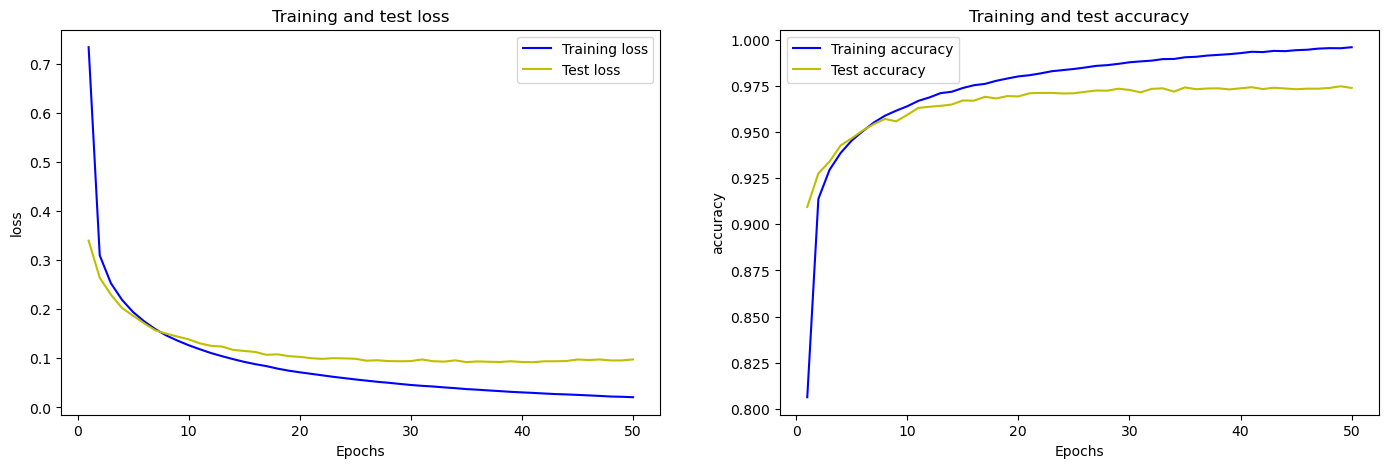

In [8]:
#8-1-e

model = Sequential()
model.add(Dense(50,input_dim=image_height*image_width,activation='relu'))
model.add(Dense(10,activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=512, verbose=0)
plot(history)

The provided code is written in Python and uses the Keras library to create and train a simple neural network model for image classification. 

The model is initialized as a Sequential model. Sequential is a Keras model for linear stacking of layers. That means each layer has exactly one input tensor and one output tensor. 

The first layer of the model is a Dense layer with 50 neurons and a 'relu' activation function. The input dimension is the product of image height and width, which suggests that the input images are being flattened into a 1D array before being fed into the model. The 'relu' (Rectified Linear Unit) activation function is a popular choice in deep learning models and it helps the model learn complex patterns in the data.

The second layer is another Dense layer with 10 neurons and a 'softmax' activation function. The number of neurons typically corresponds to the number of classes in the classification problem. The 'softmax' function is commonly used in the output layer of a classifier where it can output a probability distribution over the classes - each neuron's output is a probability that the input belongs to its class.

The `model.summary()` function is then called to print a summary of the model, including the number of parameters in each layer and the total parameters in the model.

The model is then compiled with a 'categorical_crossentropy' loss function, 'adam' optimizer, and it will measure 'accuracy' as its metric during training. The 'categorical_crossentropy' loss function is suitable for multi-class classification problems. The 'adam' optimizer is a popular choice due to its efficiency and low memory requirement.

The model is then trained using the `fit` method on the training data (`X_train`, `y_train`) for a certain number of epochs (defined by `EPOCHS`). The batch size is set to 512, meaning that the model weights will be updated after every 512 samples. The `verbose` parameter is set to 0, which means the training process will not output any logs. The validation data (`X_test`, `y_test`) is also provided, so the model's performance on the validation set will be evaluated at the end of each epoch.

Finally, a function `plot(history)` is called, which presumably plots some aspects of the training history, although without the function definition it's hard to say exactly what is being plotted.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

None


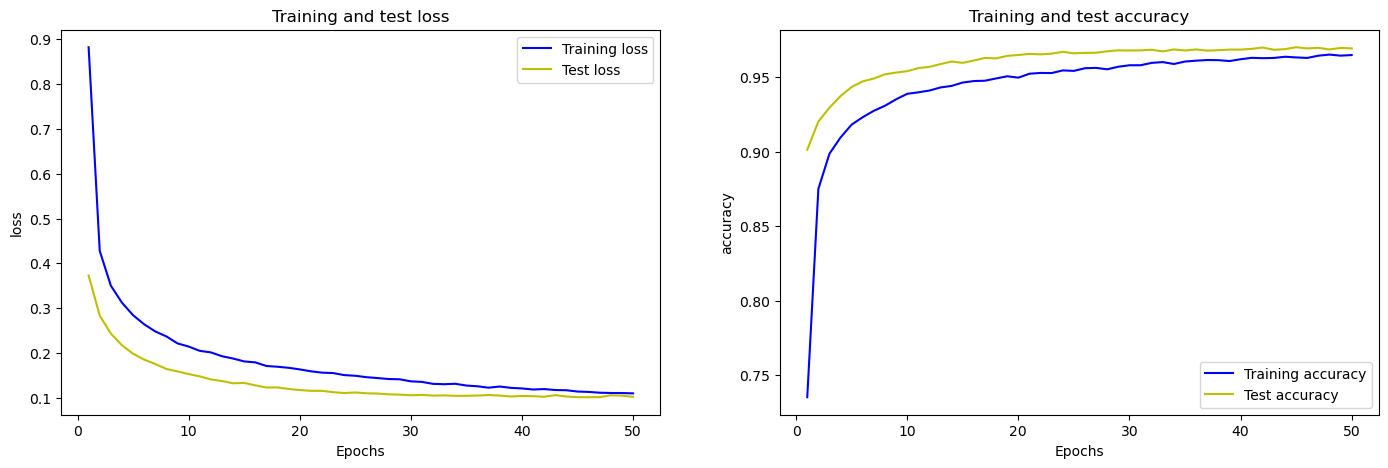

In [9]:
#8-1-f

from keras.layers import Dropout

model = Sequential()
model.add(Dense(50,input_dim=image_height*image_width,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=512, verbose=0)
plot(history)


This Python code is using the Keras library to create and train a neural network model for image classification. The specific type of model being created is a Sequential model, which is a linear stack of layers that you can easily create by passing a list of layer instances to the constructor.

The first layer is a Dense layer with 50 neurons and a ReLU (Rectified Linear Unit) activation function. The `input_dim` parameter is set to the product of `image_height` and `image_width`, which suggests that the input images are being flattened into a 1D array before being fed into the model. This is a common practice for simple feedforward neural networks.

The second layer is a Dropout layer, which randomly sets a fraction (30% in this case) of input units to 0 at each update during training time. This helps to prevent overfitting.

The third layer is another Dense layer with 10 neurons and a softmax activation function. The softmax function is often used in the final layer of a neural network-based classifier. Such a network is trained to output a vector in the output layer with probabilities of input belonging to each class, and the class with the highest probability is chosen as the output.

The `model.summary()` function is then called to print a summary representation of your model, which includes the types of layers in the model, the output shapes of these layers, and the number of parameters in each layer.

The model is then compiled with the Adam optimizer, the categorical cross entropy loss function, and accuracy as the metric to evaluate during training and testing. 

The model is then trained using the `fit` method on the training data (`X_train`, `y_train`) for a certain number of epochs (defined by `EPOCHS`). The batch size is set to 512, and `verbose` is set to 0, which means the training process will not output any logs. The validation data (`X_test`, `y_test`) is also passed to evaluate the model after every epoch.

Finally, the `plot` function is called with the `history` object returned by `model.fit()`. This object contains the training loss values and metrics values at successive epochs, as well as the validation loss values and validation metrics values (if applicable). The `plot` function is not defined in the provided code, but it likely generates a plot of these values to help visualize the training process.